# 🧪 K-Means Clustering on Mall Customer Dataset

## 📌 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


## 📌 Step 2: Load the Dataset

In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving mall_customer_dataset.csv to mall_customer_dataset.csv


In [3]:
# Load your dataset
df = pd.read_csv('mall_customer_dataset.csv')

# Show first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  68                      69
1           2  Female   56                  22                      47
2           3    Male   66                  41                      94
3           4    Male   69                  41                      62
4           5    Male   49                 112                      69


## 📌 Step 3: Explore the Dataset

In [8]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Summary statistics
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000               200.00000
mean   100.500000   44.405000           75.635000                50.55000
std     57.879185   15.353816           35.410752                30.07758
min      1.000000   18.000000           15.000000                 1.00000
25%     50.750000   32.750000           43.750000                23.75000
50%    100.500000   46.000000           74.000000                49.00000
75%    150.250000   56.000000          109.000000                76.00000
max    200.000000   69.000000          136.000000               100.00000


In [5]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## 📌 Step 4: Visualize Relationships

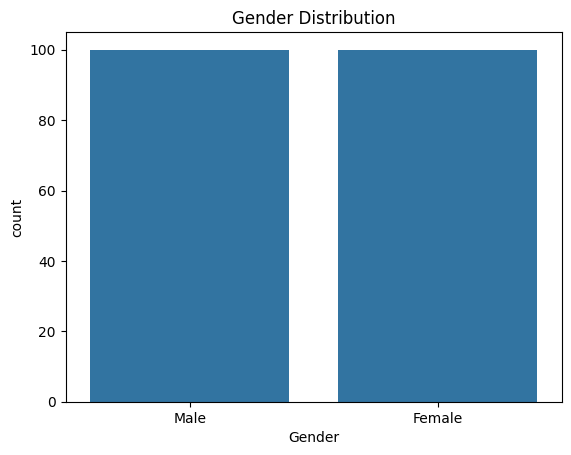

In [12]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

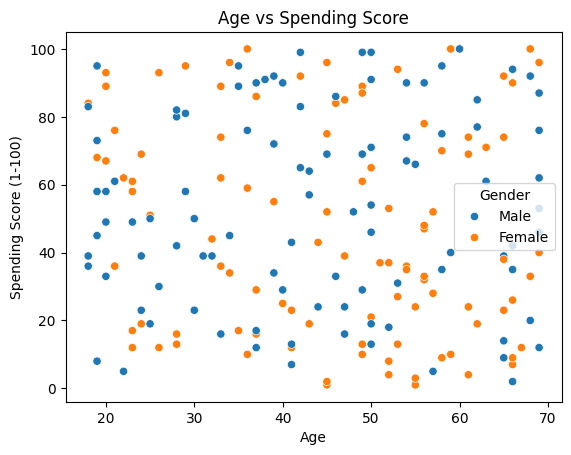

In [10]:

# Age vs Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age vs Spending Score')
plt.show()

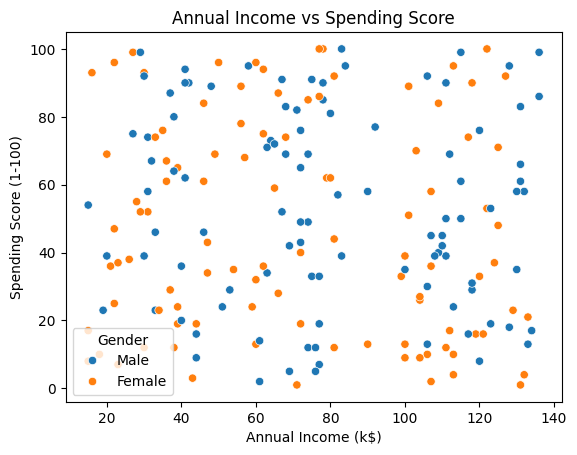

In [11]:
# Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income vs Spending Score')
plt.show()

## 📌 Step 5: Select Features for Clustering

In [13]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


## 📌 Step 6: Use Elbow Method to Find Optimal Clusters

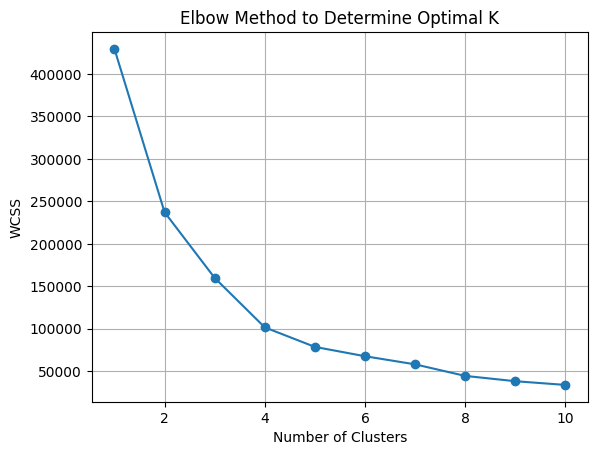

In [14]:
wcss = []  # Within-Cluster Sum of Squares

# Try cluster counts from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


## 📌 Step 7: Apply K-Means with Optimal K

In [15]:
# Fit KMeans with optimal clusters (e.g., k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


## 📌 Step 8: Visualize the Clusters

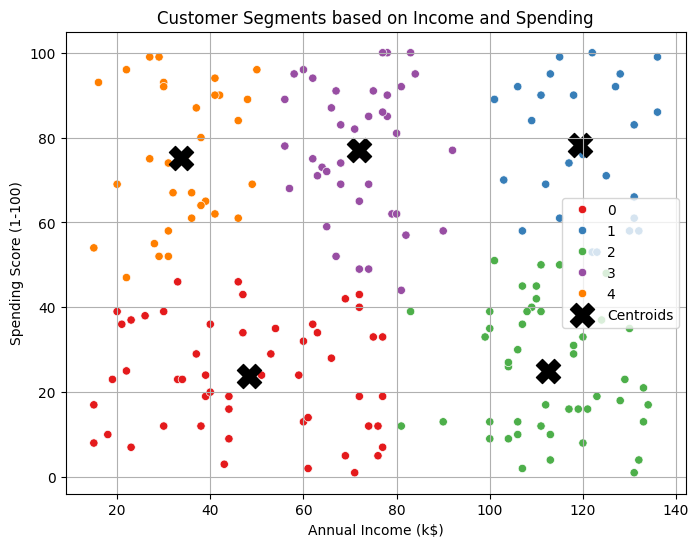

In [16]:
# Cluster visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set1'
)

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segments based on Income and Spending')
plt.legend()
plt.grid(True)
plt.show()


## 📌 Step 9: Final Output

In [17]:
# View labeled dataset with clusters
print(df.head())

# Save clustered results to CSV
df.to_csv('clustered_mall_customers.csv', index=False)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   49                  68                      69   
1           2  Female   56                  22                      47   
2           3    Male   66                  41                      94   
3           4    Male   69                  41                      62   
4           5    Male   49                 112                      69   

   Cluster  
0        3  
1        4  
2        4  
3        4  
4        1  


In [18]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
df.to_csv('clustered_mall_customers.csv', index=False)


In [20]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.43
